## Code and Output

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist_train = pd.read_csv("C:/Users/ruchi/Desktop/datasets/mnist_train.csv")
mnist_test = pd.read_csv("C:/Users/ruchi/Desktop/datasets/mnist_test.csv")

In [3]:
mnist_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train = mnist_train.drop(columns = 'label')
y_train = mnist_train['label']
X_test = mnist_test.drop(columns = 'label')
y_test = mnist_test['label']

In [5]:
shuffle_index_train = np.random.permutation(X_train.shape[0])[:500]
X_train = X_train.iloc[shuffle_index_train]
y_train = y_train.iloc[shuffle_index_train]
shuffle_index_test = np.random.permutation(X_test.shape[0])[:100]
X_test = X_test.iloc[shuffle_index_test]
y_test = y_test.iloc[shuffle_index_test]
X_train.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
24582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
random_digit_loc = 0
digit = np.array(X_train.iloc[random_digit_loc])
digit = digit.reshape((28, 28))
digit.shape

(28, 28)

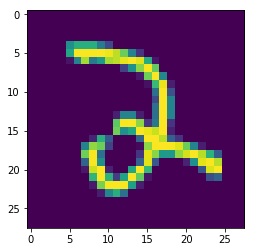

Label :  2


In [7]:
plt.imshow(digit, interpolation = 'nearest')
plt.show()
print("Label : ", y_train.iloc[random_digit_loc])

In [8]:
class KNearestNeighbor:
    
    def __init__(self):
        pass
    
    def train(self, X_tr, y_tr):
        self.X_train = X_tr
        self.y_train = y_tr
        
    def predict(self, X, k = 1):
        dists = (self.X_train * self.X_train) + (X * X) - (2 * (self.X_train * X))
        dists = np.array(dists)
        dists = dists.sum(axis = 1)
        sorted_indices = np.argsort(dists)[:k]
        y_pred_k = self.y_train.iloc[sorted_indices] 
        y_pred = np.bincount(y_pred_k).argmax()
        return y_pred

In [9]:
kNearestNeighbor = KNearestNeighbor()
kNearestNeighbor.train(X_train, y_train)

In [10]:
accuracy = np.zeros((10, 1))
for k in range (1, 11):
    y_pred = np.zeros(y_test.shape)
    for i in range (0, X_test.shape[0]):
        y_pred[i] = kNearestNeighbor.predict(X_test.iloc[i], k)
    correct = np.array(y_pred == y_test, dtype = int)
    accuracy[k - 1] = np.sum(correct) / y_test.shape[0]

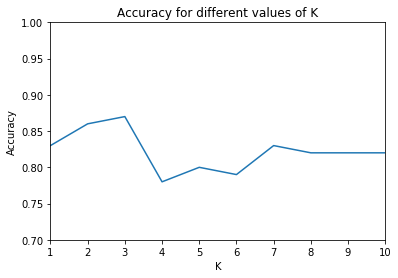

In [11]:
plt.plot(range(1, 11), accuracy)
plt.axis((1, 10, 0.7, 1))
plt.title('Accuracy for different values of K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [12]:
best_k = accuracy.argmax() + 1
max_accuracy = accuracy.max()
print("Maximum accuracy of %f is achieved when K = %d" % (max_accuracy, best_k))

Maximum accuracy of 0.870000 is achieved when K = 3
